Ваш баланс: 100000
Ваш баланс: 100100
Ваш баланс: 200100
Недостаточно средств на счете!
Ваш баланс: 150100

История операций: 
Тип операции: deposit, Сумма: 100, Дата и время: 08.11.2025 17:19:22, Текущий баланс: 100100, Статус: success
Тип операции: deposit, Сумма: 100000, Дата и время: 08.11.2025 17:19:42, Текущий баланс: 200100, Статус: success
Тип операции: withdraw, Сумма: 500000, Дата и время: 08.11.2025 17:20:02, Текущий баланс: 200100, Статус: fail
Тип операции: withdraw, Сумма: 50000, Дата и время: 08.11.2025 17:20:22, Текущий баланс: 150100, Статус: success


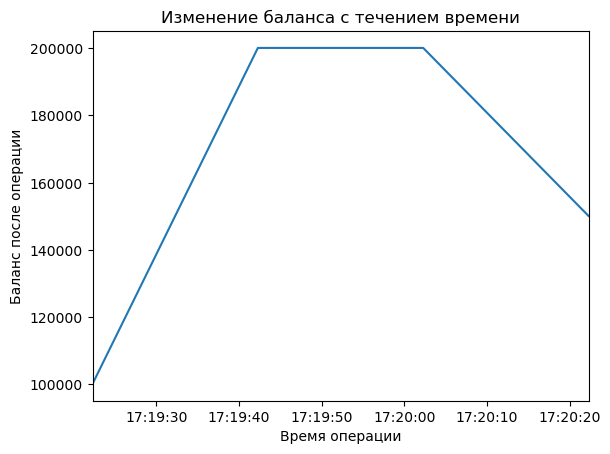

In [20]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import time
import re

class Account:
    _account_counter = 1000
    
    def __init__(self, account_holder, balance=0):
        if not self.check_holder_name(account_holder):
            raise ValueError('Имя должно быть в формате "Имя Фамилия" с заглавных букв, кириллицей или латиницей!')
        self.holder = account_holder
        self.account_number = f'ACC-{Account._account_counter}'
        Account._account_counter += 1
        if balance < 0:
            raise ValueError('Отрицательный начальный баланс!')
        self._balance = balance
        self.operations_history = []
    
    def check_holder_name(self, holder): #Метод для проверки корректности имени владельца счета (Задание 2)
        return bool(re.match(r'^[А-ЯЁ][а-яё]+\s[А-ЯЁ][а-яё]+$', holder)) or bool(re.match(r'^[A-Z][a-z]+\s[A-Z][a-z]+$', holder))
    
    def operations_register(self, operation_type, amount, operation_status): #Метод для регистрации операций
        new_operation = {'operation_type': operation_type, 'amount': amount, 'time': datetime.now(), 'current_balance': self._balance, 'operation_status': operation_status}
        self.operations_history.append(new_operation)
    
    def deposit(self, amount):
        if amount <= 0:
            raise ValueError('Сумма пополнения меньше или равна нулю!')
        self._balance += amount
        self.operations_register('deposit', amount, 'success')
    
    def withdraw(self, amount):
        if amount <= 0:
            raise ValueError('Сумма снятия меньше или равна нулю!')
        if self._balance < amount:
            self.operations_register('withdraw', amount, 'fail')
            print('Недостаточно средств на счете!')
            return
        self._balance -= amount
        self.operations_register('withdraw', amount, 'success')      
    
    def get_balance(self):
        return self._balance
    
    def get_history(self):
        return self.operations_history
    
    def print_operations(self, operations): #Метод для печати операций
        for op in operations:
            date = op['time'].strftime('%d.%m.%Y %H:%M:%S')
            print(f"Тип операции: {op['operation_type']}, Сумма: {op['amount']}, Дата и время: {date}, Текущий баланс: {op['current_balance']}, Статус: {op['operation_status']}")        
    
    def plot_history(self):
        operations_history_df = pd.DataFrame(self.operations_history)
        operations_history_df['time'] = pd.to_datetime(operations_history_df['time'])
        plt.plot(operations_history_df['time'], operations_history_df['current_balance'])
        plt.xlim(operations_history_df['time'].min(), operations_history_df['time'].max())
        plt.title('Изменение баланса с течением времени')
        plt.xlabel('Время операции')
        plt.ylabel('Баланс после операции')
        plt.show()

    def latest_big_operations(self, n): #Метод для анализа истории транзакций по размеру и дате: n отсортированных по сумме успешных операций сортируются по дате и времени от новой к старой) (Задание 2)
        successful_operations = [op for op in self.operations_history if op['operation_status'] == 'success']
        operations_by_amount = sorted(successful_operations, key=lambda x: x['amount'], reverse=True)
        last_operations = operations_by_amount[:n]
        operations_by_date = sorted(last_operations, key=lambda x: x['time'], reverse=True)
        self.print_operations(operations_by_date)
       
        
#Пример для проверки работы программы (по условиям задания 1):

new_account = Account('Bob Bob', 100000)
print(f'Ваш баланс: {new_account.get_balance()}')
new_account.deposit(100)
print(f'Ваш баланс: {new_account.get_balance()}')
time.sleep(20) #Sleep был добавлен для того, чтобы график операций не был вертикальной прямой.
new_account.deposit(100000)
print(f'Ваш баланс: {new_account.get_balance()}')
time.sleep(20)
new_account.withdraw(500000)
time.sleep(20)
new_account.withdraw(50000)
print(f'Ваш баланс: {new_account.get_balance()}')
print()
print('История операций: ')
new_account.print_operations(new_account.get_history())
new_account.plot_history()
        
        

In [21]:
class CheckingAccount(Account):
    def __init__(self, account_holder, balance=0):
        super().__init__(account_holder, balance)
        self.account_type = 'Checking account'

class SavingsAccount(Account):
    def __init__(self, account_holder, balance=0):
        super().__init__(account_holder, balance)
        self.account_type = 'Savings account'
        
    def apply_interest(self, rate):
        interest = self._balance * rate * 0.01
        return super().deposit(interest)
    
    def withdraw(self, amount):
        if amount > self._balance * 0.5:
            self.operations_register('withdraw', amount, 'fail')
            print('Сумма снятия превышает 50% от всех средств на счете!')
            return
        return super().withdraw(amount)

#Пример для проверки работы программы (по условиям задания 2):

new_savings_account = SavingsAccount('Bob Bob', 100000)
print(f'Ваш баланс: {new_savings_account.get_balance()}')
new_savings_account.deposit(100000)
print(f'Ваш баланс: {new_savings_account.get_balance()}')
time.sleep(20)
new_savings_account.apply_interest(7)
print(f'Ваш баланс после начисления процентов: {new_savings_account.get_balance()}')
time.sleep(20)
new_savings_account.withdraw(150000)
time.sleep(20)
new_savings_account.withdraw(50000)
print(f'Ваш баланс: {new_savings_account.get_balance()}')
time.sleep(20)
new_savings_account.deposit(5000)
print(f'Ваш баланс: {new_savings_account.get_balance()}')
print()
print('История операций: ')
new_savings_account.print_operations(new_savings_account.get_history())
print()
print('Последние крупные операции:')
new_savings_account.latest_big_operations(2)

Ваш баланс: 100000
Ваш баланс: 200000
Ваш баланс после начисления процентов: 214000.0
Сумма снятия превышает 50% от всех средств на счете!
Ваш баланс: 164000.0
Ваш баланс: 169000.0

История операций: 
Тип операции: deposit, Сумма: 100000, Дата и время: 08.11.2025 17:20:51, Текущий баланс: 200000, Статус: success
Тип операции: deposit, Сумма: 14000.0, Дата и время: 08.11.2025 17:21:11, Текущий баланс: 214000.0, Статус: success
Тип операции: withdraw, Сумма: 150000, Дата и время: 08.11.2025 17:21:31, Текущий баланс: 214000.0, Статус: fail
Тип операции: withdraw, Сумма: 50000, Дата и время: 08.11.2025 17:21:51, Текущий баланс: 164000.0, Статус: success
Тип операции: deposit, Сумма: 5000, Дата и время: 08.11.2025 17:22:11, Текущий баланс: 169000.0, Статус: success

Последние крупные операции:
Тип операции: withdraw, Сумма: 50000, Дата и время: 08.11.2025 17:21:51, Текущий баланс: 164000.0, Статус: success
Тип операции: deposit, Сумма: 100000, Дата и время: 08.11.2025 17:20:51, Текущий бала